In [1]:
import ants
import nilearn
from nilearn import image
import os, glob
import shutil
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
from nipype.interfaces.ants import ApplyTransforms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [28]:
directory = [i for i in os.listdir('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip') if i.startswith('BERCER027')]

gpi_lh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/TOR-PSM_GPi_lh.nii.gz')
gpi_rh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/TOR-PSM_GPi_rh.nii.gz')

#resample and binarize patients
def resample_binarize(sub,gpi,path):
    re_sub = resample_to_img(sub,gpi,interpolation='nearest')
    re_binarized_sub = math_img('img > 0.1', img=re_sub)
    nib.save(re_binarized_sub,path)

for i in directory:
    print(i)
    
    #load in native stns for resampling anchor
#     gpi_native_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_GPI_lh_native_output.nii')
#     gpi_native_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_GPI_rh_native_output.nii')
   
#     #load in patients
#     native_lh_sub = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/stimulations/native/gs_/{i}_sim-binary_model-ossdbs_hemi-L.nii')
#     native_rh_sub = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/stimulations/native/gs_/{i}_sim-binary_model-ossdbs_hemi-R.nii')
#     native2mni_lh_sub = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/stimulations/native2MNI/gs_/{i}_sim-binary_model-ossdbs_hemi-L.nii')
#     native2mni_rh_sub = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/stimulations/native2MNI/gs_/{i}_sim-binary_model-ossdbs_hemi-R.nii')
    mni_lh_sub = load_img(f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/stimulations/MNI/{i}_sim-binary_model-simbio_hemi-L.nii')
    mni_rh_sub = load_img(f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/stimulations/MNI/{i}_sim-binary_model-simbio_hemi-R.nii')

    #call resample binarize
#     resample_binarize(native_lh_sub,gpi_native_lh,f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native_sim-binary_model-ossdbs_hemi-L.nii')
#     resample_binarize(native_rh_sub,gpi_native_rh,f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native_sim-binary_model-ossdbs_hemi-R.nii')
#     resample_binarize(native2mni_lh_sub,gpi_lh,f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native2MNI_sim-binary_model-ossdbs_hemi-L.nii')
#     resample_binarize(native2mni_rh_sub,gpi_rh,f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native2MNI_sim-binary_model-ossdbs_hemi-R.nii')
    resample_binarize(mni_lh_sub,gpi_lh,f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-L.nii')
    resample_binarize(mni_rh_sub,gpi_rh,f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-R.nii')

BERCER027


In [43]:
#get volumes of binary and efield overlap
directory = [i for i in os.listdir('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip') if i.startswith('BERCER027')]

#make lists to store outputs in
native_gpi_lh,native_gpi_rh,native2mni_gpi_lh,native2mni_gpi_rh,mni_gpi_lh,mni_gpi_rh = [],[],[],[],[],[]
native_n64_lh,native_n64_rh,native2mni_n64_lh,native2mni_n64_rh,mni_n64_lh,mni_n64_rh = [],[],[],[],[],[]
native_gpi_sensorimotor_lh,native_gpi_sensorimotor_rh,native2mni_gpi_sensorimotor_lh,native2mni_gpi_sensorimotor_rh,mni_gpi_sensorimotor_lh,mni_gpi_sensorimotor_rh = [],[],[],[],[],[]
native_cervical_lh,native_cervical_rh,native2mni_cervical_lh,native2mni_cervical_rh,mni_cervical_lh,mni_cervical_rh = [],[],[],[],[],[]

#load in mni hotspots
gpi_lh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/TOR-PSM_GPi_lh.nii.gz')
gpi_rh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/TOR-PSM_GPi_rh.nii.gz')
n64_lh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/dystonia_gpi_n64_hotspot_lh.nii.gz')
n64_rh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/dystonia_gpi_n64_hotspot_rh.nii.gz')
gpi_sensorimotor_lh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/GPi_sensorimotor_lh.nii.gz')
gpi_sensorimotor_rh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/GPi_sensorimotor_rh.nii.gz')
cervical_lh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/Sweetspot_cervical_lh.nii.gz')
cervical_rh = load_img('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Hotspots&Atlases/resampled/Sweetspot_cervical_rh.nii.gz')

def get_efield_overlap(gpi,sub,volume_list):
    mask = math_img('img1*img2',img1=gpi,img2=sub)
    mask = mask.get_fdata()
    no0_mask = mask[mask!=0]
    volume = np.mean(no0_mask)
    volume_list.append(volume)

def get_binary_overlap(gpi,sub,volume_list):
    mask = math_img('img1*img2',img1=gpi,img2=sub)
    mask = mask.get_fdata()
    volume = np.sum(mask)
    volume_list.append(volume)

#loop over to get volume
for i in directory:
    print(i)
    #load in all subjects: native, native2mni, and mni
#     sub_native_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native_sim-binary_model-ossdbs_hemi-L.nii')
#     sub_native_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native_sim-binary_model-ossdbs_hemi-R.nii')
#     sub_native2mni_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native2MNI_sim-binary_model-ossdbs_hemi-L.nii')
#     sub_native2mni_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/resampled/{i}_native2MNI_sim-binary_model-ossdbs_hemi-R.nii')
    sub_mni_lh = load_img(f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-L.nii')
    sub_mni_rh = load_img(f'/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Field Trip/{i}/resampled/{i}_MNI_sim-binary_model-simbio_hemi-R.nii')
    
    #load in native hotspots
#     stn_nativespace_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_STN_lh_native_output.nii')
#     stn_nativespace_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_STN_rh_native_output.nii')
#     stn_motor_nativespace_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_STN_motor_lh_native_output.nii')
#     stn_motor_nativespace_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_STN_motor_rh_native_output.nii')
#     pd_nativespace_lh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_pd_stn_n275_hotspot_lh_native_output.nii')
#     pd_nativespace_rh = load_img(f'/Volumes/Cingulate/Berlin51/OSS-DBS/{i}/{i}_pd_stn_n275_hotspot_rh_native_output.nii')
    
    #call function to get the overlap!
#     get_overlap(stn_nativespace_lh,sub_native_lh,native_stn_lh)
#     get_overlap(stn_nativespace_rh,sub_native_rh,native_stn_rh)
#     get_overlap(stn_motor_nativespace_lh,sub_native_lh,native_stn_motor_lh)
#     get_overlap(stn_motor_nativespace_rh,sub_native_rh,native_stn_motor_rh)
#     get_overlap(pd_nativespace_lh,sub_native_lh,native_pd_lh)
#     get_overlap(pd_nativespace_rh,sub_native_rh,native_pd_rh)
    
#     get_overlap(stn_lh,sub_native2mni_lh,native2mni_stn_lh)
#     get_overlap(stn_rh,sub_native2mni_rh,native2mni_stn_rh)
#     get_overlap(stn_motor_lh,sub_native2mni_lh,native2mni_stn_motor_lh)
#     get_overlap(stn_motor_rh,sub_native2mni_rh,native2mni_stn_motor_rh)
#     get_overlap(pd_lh,sub_native2mni_lh,native2mni_pd_lh)
#     get_overlap(pd_rh,sub_native2mni_rh,native2mni_pd_rh)
    
    get_efield_overlap(gpi_lh,sub_mni_lh,mni_gpi_lh)
    get_efield_overlap(gpi_rh,sub_mni_rh,mni_gpi_rh)
    get_efield_overlap(n64_lh,sub_mni_lh,mni_n64_lh)
    get_efield_overlap(n64_rh,sub_mni_rh,mni_n64_rh)
    get_binary_overlap(gpi_sensorimotor_lh,sub_mni_lh,mni_gpi_sensorimotor_lh)
    get_binary_overlap(gpi_sensorimotor_rh,sub_mni_rh,mni_gpi_sensorimotor_rh)
    get_efield_overlap(cervical_lh,sub_mni_lh,mni_cervical_lh)
    get_efield_overlap(cervical_rh,sub_mni_rh,mni_cervical_rh)

BERCER027


In [44]:
#get bilateral values for each column, taking the average
# native_gpi_bi,native_n64_bi,native_gpi_sensorimotor_bi,native_cervical_bi = [],[],[],[]
# native2mni_gpi_bi,native2mni_n64_bi,native2mni_gpi_sensorimotor_bi,native2mni_cervical_bi = [],[],[],[]
mni_gpi_bi,mni_n64_bi,mni_gpi_sensorimotor_bi,mni_cervical_bi = [],[],[],[]

def efield_bilateral(list1,list2,averages_list):
    averages = [(x + y) / 2 for x, y in zip(list1, list2)]
    averages_list.extend(averages)
    
def binary_bilateral(list1,list2,sums_list):
    sums = [(x + y) for x, y in zip(list1, list2)]
    sums_list.extend(sums)

# efield_bilateral(native_gpi_lh,native_gpi_rh,native_gpi_bi)
# efield_bilateral(native2mni_gpi_lh,native2mni_gpi_rh,native2mni_gpi_bi)
efield_bilateral(mni_gpi_lh,mni_gpi_rh,mni_gpi_bi)

# efield_bilateral(native_n64_lh,native_n64_rh,native_n64_bi)
# efield_bilateral(native2mni_n64_lh,native2mni_n64_rh,native2mni_n64_bi)
efield_bilateral(mni_n64_lh,mni_n64_rh,mni_n64_bi)

# binary_bilateral(native_gpi_sensorimotor_lh,native_gpi_sensorimotor_rh,native_gpi_sensorimotor_bi)
# binary_bilateral(native2mni_gpi_sensorimotor_lh,native2mni_gpi_sensorimotor_rh,native2mni_gpi_sensorimotor_bi)
binary_bilateral(mni_gpi_sensorimotor_lh,mni_gpi_sensorimotor_rh,mni_gpi_sensorimotor_bi)

# efield_bilateral(native_cervical_lh,native_cervical_rh,native_cervical_bi)
# efield_bilateral(native2mni_cervical_lh,native2mni_cervical_rh,native2mni_cervical_bi)
efield_bilateral(mni_cervical_lh,mni_cervical_rh,mni_cervical_bi)

In [45]:
sub_ids = []
for i in directory:
    sub_ids.append(i)

In [46]:
df = pd.DataFrame(
    {'ID': sub_ids,
#      'Native_GPi_LH_Volume_Overlap': native_gpi_lh,
#      'Native_GPi_RH_Volume_Overlap': native_gpi_rh,
#      'Native2MNI_GPi_LH_Volume_Overlap': native2mni_gpi_lh,
#      'Native2MNI_GPi_RH_Volume_Overlap': native2mni_gpi_rh,
     'MNI_GPi_LH_Volume_Overlap': mni_gpi_lh,
     'MNI_GPi_RH_Volume_Overlap': mni_gpi_rh,
     'MNI_GPi_Bi_Volume_Overlap': mni_gpi_bi,
#      'Native_GPi_Sensorimotor_LH_Volume_Overlap': native_gpi_sensorimotor_lh,
#      'Native_GPi_Sensorimotor_RH_Volume_Overlap': native_gpi_sensorimotor_rh,
#      'Native2MNI_GPi_Sensorimotor_LH_Volume_Overlap': native2mni_gpi_sensorimotor_lh,
#      'Native2MNI_GPi_Sensorimotor_RH_Volume_Overlap': native2mni_gpi_sensorimotor_rh,
     'MNI_GPi_Sensorimotor_LH_Volume_Overlap': mni_gpi_sensorimotor_lh,
     'MNI_GPi_Sensorimotor_RH_Volume_Overlap': mni_gpi_sensorimotor_rh,
     'MNI_GPi_Sensorimotor_Bi_Volume_Overlap': mni_gpi_sensorimotor_bi,
#      'Native_n64_Hotspot_LH_Volume_Overlap': native_n64_lh,
#      'Native_n64_Hotspot_RH_Volume_Overlap': native_n64_rh,
#      'Native2MNI_n64_Hotspot_LH_Volume_Overlap': native2mni_n64_lh,
#      'Native2MNI_n64_Hotspot_RH_Volume_Overlap': native2mni_n64_rh,
     'MNI_n64_Hotspot_LH_Volume_Overlap': mni_n64_lh,
     'MNI_n64_Hotspot_RH_Volume_Overlap': mni_n64_rh,
     'MNI_n64_Hotspot_Bi_Volume_Overlap': mni_n64_bi,
#      'Native_Cervical_Hotspot_LH_Volume_Overlap': native_cervical_lh,
#      'Native_Cervical_Hotspot_RH_Volume_Overlap': native_cervical_rh,
#      'Native2MNI_Cervical_Hotspot_LH_Volume_Overlap': native2mni_cervical_lh,
#      'Native2MNI_Cervical_Hotspot_RH_Volume_Overlap': native2mni_cervical_rh,
     'MNI_Cervical_Hotspot_LH_Volume_Overlap': mni_cervical_lh,
     'MNI_Cervical_Hotspot_RH_Volume_Overlap': mni_cervical_rh,
     'MNI_Cervical_Hotspot_Bi_Volume_Overlap': mni_cervical_bi
    })

df.to_csv('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Dystonia_Overlap_BERCER027.csv')

# Plots

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_51466/1231309259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


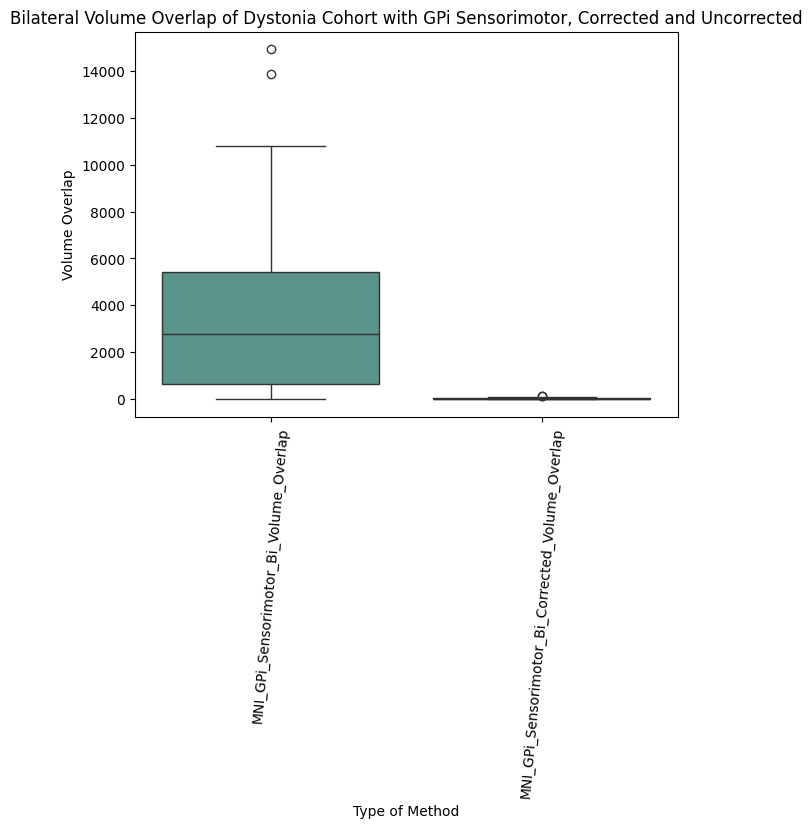

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_51466/1231309259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


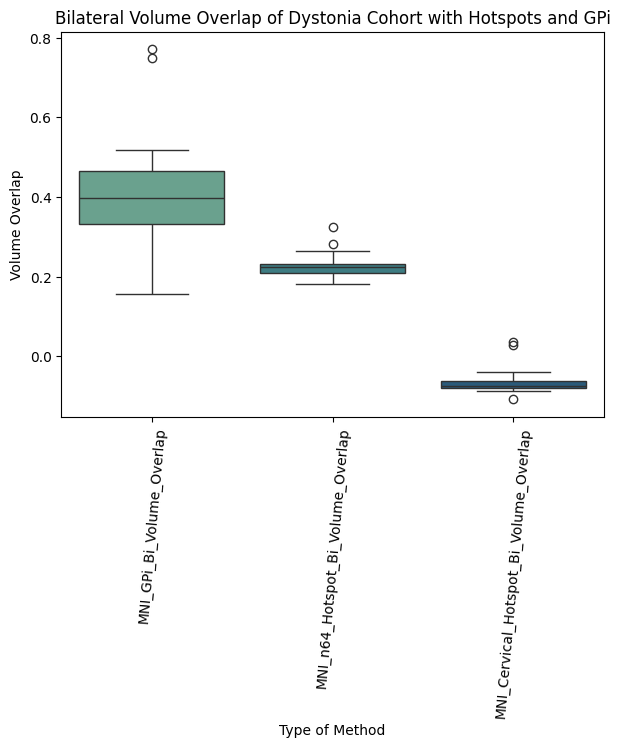

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_51466/1231309259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


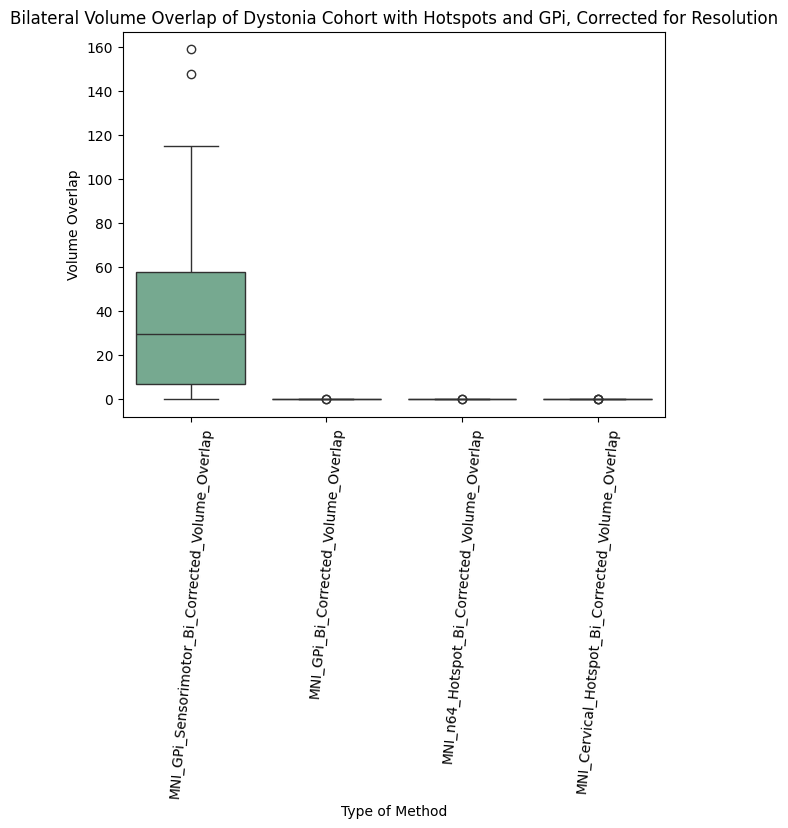

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_51466/1231309259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')


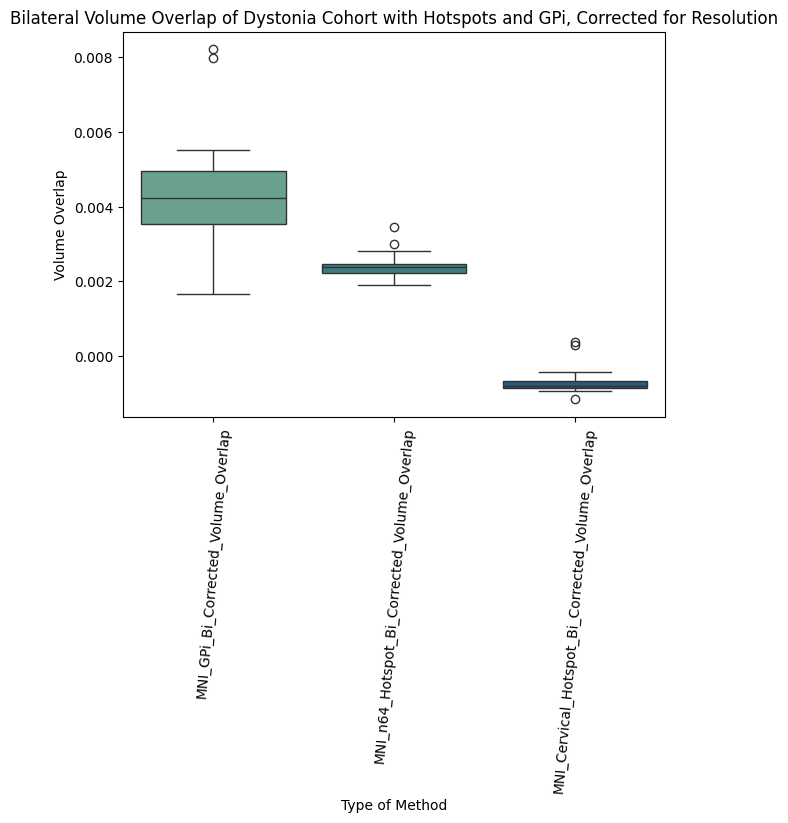

In [5]:
#plotting bilateral overlap with STN and motor STN
def plot_overlap(columns_to_include,title,path):
    df = pd.read_csv('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Dystonia_Overlap.csv')
    selected_df = df[columns_to_include]
    melted_df = selected_df.melt(var_name='Column', value_name='Value')
    melted_df = melted_df.sort_values(by='Value', ascending=False)

    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='Column', y='Value', data=melted_df,palette='crest')
    ax.set(xlabel = 'Type of Method',ylabel='Volume Overlap',title=title)
    ax.tick_params(axis='x', rotation=85)
    plt.savefig(path)
    plt.show()
    
plot_overlap((['MNI_GPi_Sensorimotor_Bi_Volume_Overlap','MNI_GPi_Sensorimotor_Bi_Corrected_Volume_Overlap']),'Bilateral Volume Overlap of Dystonia Cohort with GPi Sensorimotor, Corrected and Uncorrected','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Bilateral Volume Overlap with GPi Sensorimotor, Corrected and Uncorrected.png.png')
plot_overlap((['MNI_GPi_Bi_Volume_Overlap','MNI_n64_Hotspot_Bi_Volume_Overlap','MNI_Cervical_Hotspot_Bi_Volume_Overlap']),'Bilateral Volume Overlap of Dystonia Cohort with Hotspots and GPi','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Bilateral Uncorrected Volume Overlap with Hotspots and GPi.png')
plot_overlap((['MNI_GPi_Bi_Corrected_Volume_Overlap','MNI_GPi_Sensorimotor_Bi_Corrected_Volume_Overlap','MNI_n64_Hotspot_Bi_Corrected_Volume_Overlap','MNI_Cervical_Hotspot_Bi_Corrected_Volume_Overlap']),'Bilateral Volume Overlap of Dystonia Cohort with Hotspots and GPi, Corrected for Resolution','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Bilateral Corrected Volume Overlap with Hotspots and GPi, Sensorimotor.png')
plot_overlap((['MNI_GPi_Bi_Corrected_Volume_Overlap','MNI_n64_Hotspot_Bi_Corrected_Volume_Overlap','MNI_Cervical_Hotspot_Bi_Corrected_Volume_Overlap']),'Bilateral Volume Overlap of Dystonia Cohort with Hotspots and GPi, Corrected for Resolution','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Bilateral Corrected Volume Overlap with GPi.png')

In [3]:
#get r and p values for overlaps- corrected
def r_p(vol_overlap_col):
    df = pd.read_csv('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Dystonia_Overlap.csv')
    df = df.dropna()
    pearson_r, pearson_p = pearsonr(df['Twstrs_Improvement%'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df['Twstrs_Improvement%'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

mni_gpi_pearson_r,mni_gpi_pearson_p,mni_gpi_spearman_r,mni_gpi_spearman_p = r_p('MNI_GPi_Bi_Corrected_Volume_Overlap')
mni_gpi_sensorimotor_pearson_r,mni_gpi_sensorimotor_pearson_p,mni_gpi_sensorimotor_spearman_r,mni_gpi_sensorimotor_spearman_p = r_p('MNI_GPi_Sensorimotor_Bi_Corrected_Volume_Overlap')
mni_n64_pearson_r,mni_n64_pearson_p,mni_n64_spearman_r,mni_n64_spearman_p = r_p('MNI_n64_Hotspot_Bi_Corrected_Volume_Overlap')
mni_cervical_pearson_r,mni_cervical_pearson_p,mni_cervical_spearman_r,mni_cervical_spearman_p = r_p('MNI_Cervical_Hotspot_Bi_Corrected_Volume_Overlap')

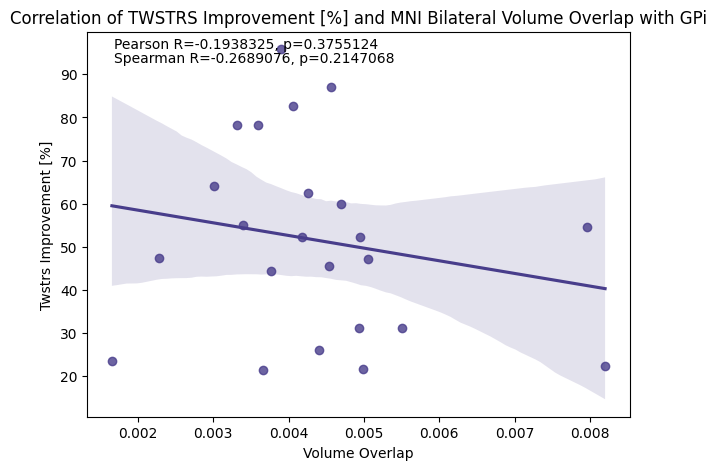

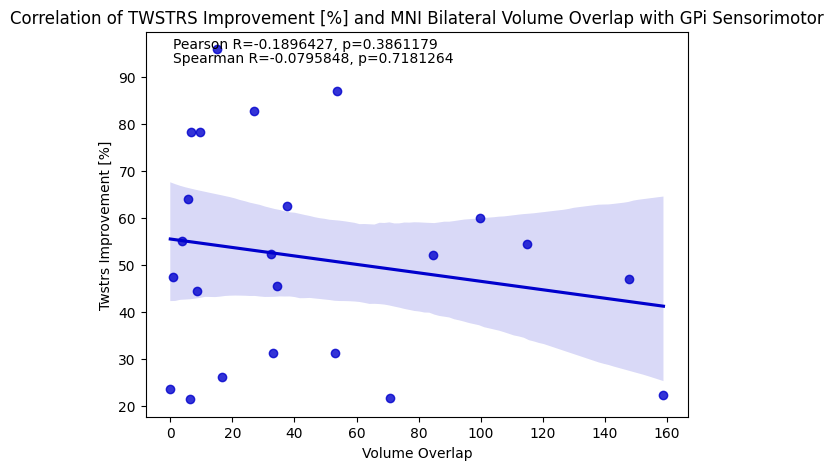

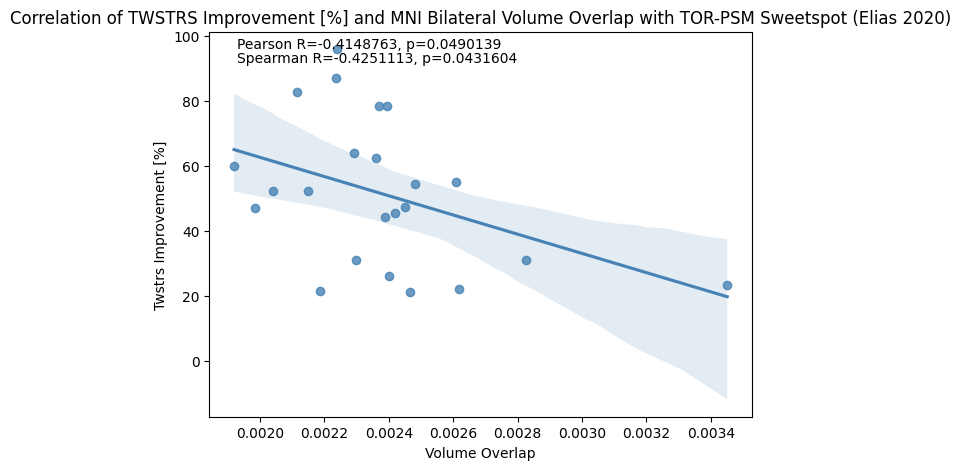

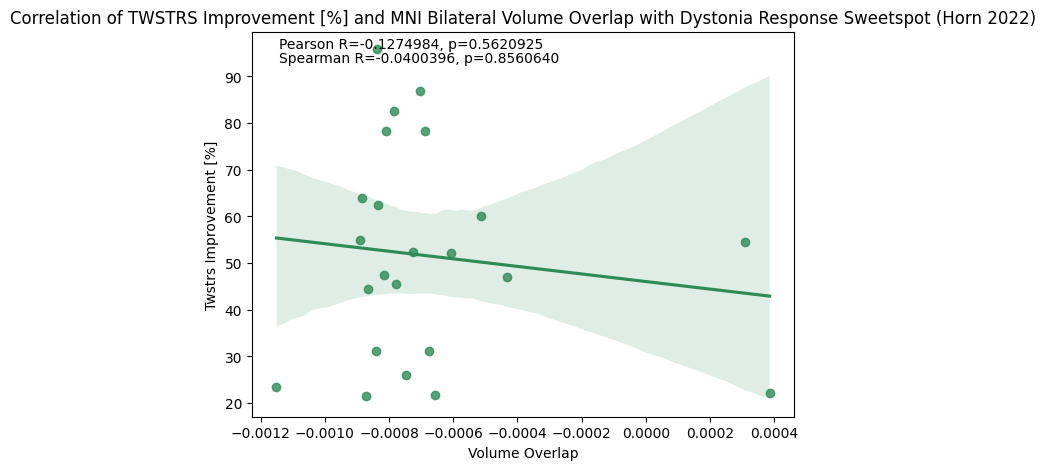

In [4]:
#correlation plots
def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df['Twstrs_Improvement%'], color=color)
    plt.title(title)
    plt.xlabel('Volume Overlap')
    plt.ylabel('Twstrs Improvement [%]')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),
            transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),
            transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()

df = pd.read_csv('/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Dystonia_Overlap.csv')

plot_analysis(df['MNI_GPi_Bi_Corrected_Volume_Overlap'],'Correlation of TWSTRS Improvement [%] and MNI Bilateral Volume Overlap with GPi',mni_gpi_pearson_r,mni_gpi_pearson_p,mni_gpi_spearman_r,mni_gpi_spearman_p,'darkslateblue','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Correlation of TWSTRS Improvement [%] and MNI Bilateral Corrected Volume Overlap with GPi.png')
plot_analysis(df['MNI_GPi_Sensorimotor_Bi_Corrected_Volume_Overlap'],'Correlation of TWSTRS Improvement [%] and MNI Bilateral Volume Overlap with GPi Sensorimotor',mni_gpi_sensorimotor_pearson_r,mni_gpi_sensorimotor_pearson_p,mni_gpi_sensorimotor_spearman_r,mni_gpi_sensorimotor_spearman_p,'mediumblue','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Correlation of TWSTRS Improvement [%] and MNI Bilateral Corrected Volume Overlap with Sensorimotor GPi.png')
plot_analysis(df['MNI_n64_Hotspot_Bi_Corrected_Volume_Overlap'],'Correlation of TWSTRS Improvement [%] and MNI Bilateral Volume Overlap with TOR-PSM Sweetspot (Elias 2020)',mni_n64_pearson_r,mni_n64_pearson_p,mni_n64_spearman_r,mni_n64_spearman_p,'steelblue','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Correlation of TWSTRS Improvement [%] and MNI Bilateral Corrected Volume Overlap with GPi Sweetspot (Elias 2020).png')
plot_analysis(df['MNI_Cervical_Hotspot_Bi_Corrected_Volume_Overlap'],'Correlation of TWSTRS Improvement [%] and MNI Bilateral Volume Overlap with Dystonia Response Sweetspot (Horn 2022)',mni_cervical_pearson_r,mni_cervical_pearson_p,mni_cervical_spearman_r,mni_cervical_spearman_p,'seagreen','/Volumes/Cingulate/Native&MNI_Overlaps/Dystonia/Figures/Correlation of TWSTRS Improvement [%] and MNI Bilateral Corrected Volume Overlap with GPi Sweetspot (Horn 2022).png')